In [21]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


import warnings
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

warnings.filterwarnings('ignore')

In [22]:
apple_stock_df = pd.read_csv("./apple_stock_prepared.csv")
apple_stock_df.head()

,volume,close_lag1,close_lag2,close_lag3,close_lag4,close_lag5,close_lag6,ma_3,rsi_3,ma_6,rsi_6,ma_9,rsi_9,ma_12,rsi_12,event,close
0,-0.464011,-0.767950,-0.747017,-0.739101,-0.639217,-0.669514,-0.646494,0.627785,-1.812133,4.368171,-1.830292,7.716514,-1.862736,8.506598,-1.880503,-0.456953,2.338571
1,-0.190969,-0.769480,-0.758587,-0.738967,-0.732728,-0.632766,-0.662760,-0.579982,-1.183392,1.505926,-1.592107,3.501353,-1.710687,5.255354,-1.767605,-0.456953,2.945714
2,-0.723175,-0.760056,-0.760125,-0.750631,-0.732592,-0.727153,-0.625758,-0.115027,-1.286573,0.152772,-1.626297,2.429129,-1.732050,4.553852,-1.782792,-0.456953,2.750000
3,-0.570132,-0.763094,-0.750650,-0.752182,-0.744357,-0.727016,-0.720797,-0.092085,-0.982726,-0.217920,-1.529132,1.347659,-1.674853,2.875177,-1.742103,-0.456953,2.941429
4,-0.692599,-0.760123,-0.753705,-0.742630,-0.745922,-0.738891,-0.720659,-0.694639,-0.034087,-0.992704,-1.141034,-0.009939,-1.444629,1.005462,-1.579137,-0.456953,3.678571


In [23]:
X = apple_stock_df[apple_stock_df.columns[0:-1]]
Y = apple_stock_df[apple_stock_df.columns[-1]]

In [24]:
import random
random.seed(100)

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state = 100)
X_val, X_test, Y_val, Y_test = train_test_split(X_test,Y_test,test_size=0.5, random_state = 100)

In [26]:
X_train.shape

(156, 16)

In [27]:
X_test.shape

(20, 16)

In [28]:
X_val.shape

(20, 16)

### determine teh number of step based on batch size:

In [29]:
def num_steps(length: int, batch_size: int):
    return length//batch_size + 1

In [30]:
batch_size = 10
num_steps(len(X_train), batch_size)

16

# Neural Network

In [31]:
def stock_predictor_model(x_train):

    stock_predictor = Sequential()
    # One Dense layer with number of units same as features
    stock_predictor.add(Dense(10, input_dim=x_train.shape[1],
                    activation='relu',
                    kernel_initializer='he_normal'))
    
    stock_predictor.add(Dense(6, input_dim=10,
                    activation='relu',
                    kernel_initializer='he_normal'))
    
    stock_predictor.add(Dense(3, input_dim=6,
                activation='relu',
                kernel_initializer='he_normal'))
    
    # Final dense layer
    stock_predictor.add(Dense(1, activation='relu',
                    kernel_initializer='he_normal'))
    
    # Using mse as loss and mape as the metric
    stock_predictor.compile(loss='mean_squared_error',
                  optimizer='rmsprop',
                  metrics=['mape'])
    
    return stock_predictor

In [32]:
model = stock_predictor_model(X_train)

##  Visualize keras model by using Pydot

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                170       
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 66        
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 21        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 4         
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


## Train the model using basic parameters.

In [34]:
batch_size = 20
num_steps(len(X_train), batch_size)

8

In [35]:
history = model.fit(X_train, Y_train, 
                    validation_data=[X_val, Y_val],
                    batch_size=batch_size,
                    epochs=1000,
                    verbose=1)

Train on 156 samples, validate on 20 samples
Epoch 1/1000
156/156 [==============================] - 0s 1ms/sample - loss: 4696.1666 - mean_absolute_percentage_error: 92.6322 - val_loss: 24268.8164 - val_mean_absolute_percentage_error: 94.9296
Epoch 2/1000
156/156 [==============================] - 0s 96us/sample - loss: 4655.2345 - mean_absolute_percentage_error: 94.0210 - val_loss: 24223.4609 - val_mean_absolute_percentage_error: 94.0623
Epoch 3/1000
156/156 [==============================] - 0s 115us/sample - loss: 4619.4503 - mean_absolute_percentage_error: 96.6418 - val_loss: 24178.3320 - val_mean_absolute_percentage_error: 93.1340
Epoch 4/1000
156/156 [==============================] - 0s 96us/sample - loss: 4581.7138 - mean_absolute_percentage_error: 97.8476 - val_loss: 24132.4336 - val_mean_absolute_percentage_error: 92.0468
Epoch 5/1000
156/156 [==============================] - 0s 83us/sample - loss: 4543.1923 - mean_absolute_percentage_error: 100.3295 - val_loss: 24085.4102 

156/156 [==============================] - 0s 90us/sample - loss: 2030.0142 - mean_absolute_percentage_error: 179.5062 - val_loss: 18771.4785 - val_mean_absolute_percentage_error: 86.3785
Epoch 42/1000
156/156 [==============================] - 0s 90us/sample - loss: 1942.7915 - mean_absolute_percentage_error: 179.6641 - val_loss: 18522.1113 - val_mean_absolute_percentage_error: 86.4312
Epoch 43/1000
156/156 [==============================] - 0s 96us/sample - loss: 1852.8821 - mean_absolute_percentage_error: 177.2120 - val_loss: 18258.6133 - val_mean_absolute_percentage_error: 86.6891
Epoch 44/1000
156/156 [==============================] - 0s 83us/sample - loss: 1763.2275 - mean_absolute_percentage_error: 177.9410 - val_loss: 18005.4180 - val_mean_absolute_percentage_error: 86.3034
Epoch 45/1000
156/156 [==============================] - 0s 77us/sample - loss: 1674.9067 - mean_absolute_percentage_error: 175.3555 - val_loss: 17740.6426 - val_mean_absolute_percentage_error: 86.0467
Epoc

156/156 [==============================] - 0s 90us/sample - loss: 337.5757 - mean_absolute_percentage_error: 67.4238 - val_loss: 12140.8389 - val_mean_absolute_percentage_error: 61.8122
Epoch 82/1000
156/156 [==============================] - 0s 83us/sample - loss: 328.8344 - mean_absolute_percentage_error: 65.9306 - val_loss: 12108.4658 - val_mean_absolute_percentage_error: 61.2056
Epoch 83/1000
156/156 [==============================] - 0s 90us/sample - loss: 321.1000 - mean_absolute_percentage_error: 64.4166 - val_loss: 12089.2598 - val_mean_absolute_percentage_error: 60.8020
Epoch 84/1000
156/156 [==============================] - 0s 70us/sample - loss: 313.1328 - mean_absolute_percentage_error: 63.5712 - val_loss: 12085.9023 - val_mean_absolute_percentage_error: 60.7315
Epoch 85/1000
156/156 [==============================] - 0s 77us/sample - loss: 303.4904 - mean_absolute_percentage_error: 61.7707 - val_loss: 12038.1318 - val_mean_absolute_percentage_error: 60.6855
Epoch 86/1000


Epoch 122/1000
156/156 [==============================] - 0s 96us/sample - loss: 133.4116 - mean_absolute_percentage_error: 41.8333 - val_loss: 11887.0137 - val_mean_absolute_percentage_error: 49.2780
Epoch 123/1000
156/156 [==============================] - 0s 90us/sample - loss: 129.9624 - mean_absolute_percentage_error: 41.4808 - val_loss: 11881.6025 - val_mean_absolute_percentage_error: 48.9563
Epoch 124/1000
156/156 [==============================] - 0s 90us/sample - loss: 126.8816 - mean_absolute_percentage_error: 41.1995 - val_loss: 11895.2158 - val_mean_absolute_percentage_error: 48.7422
Epoch 125/1000
156/156 [==============================] - 0s 91us/sample - loss: 123.4805 - mean_absolute_percentage_error: 41.2616 - val_loss: 11915.9121 - val_mean_absolute_percentage_error: 48.1899
Epoch 126/1000
156/156 [==============================] - 0s 83us/sample - loss: 120.9682 - mean_absolute_percentage_error: 41.2344 - val_loss: 11923.9971 - val_mean_absolute_percentage_error: 47.

156/156 [==============================] - 0s 121us/sample - loss: 49.3763 - mean_absolute_percentage_error: 35.7908 - val_loss: 11979.1348 - val_mean_absolute_percentage_error: 37.5711
Epoch 163/1000
156/156 [==============================] - 0s 134us/sample - loss: 47.8592 - mean_absolute_percentage_error: 35.3780 - val_loss: 11963.5684 - val_mean_absolute_percentage_error: 37.3605
Epoch 164/1000
156/156 [==============================] - 0s 141us/sample - loss: 47.3620 - mean_absolute_percentage_error: 35.3948 - val_loss: 12010.9199 - val_mean_absolute_percentage_error: 36.8745
Epoch 165/1000
156/156 [==============================] - 0s 141us/sample - loss: 45.0810 - mean_absolute_percentage_error: 35.4317 - val_loss: 12037.2119 - val_mean_absolute_percentage_error: 36.4296
Epoch 166/1000
156/156 [==============================] - 0s 83us/sample - loss: 44.4281 - mean_absolute_percentage_error: 35.1928 - val_loss: 11984.8682 - val_mean_absolute_percentage_error: 35.9705
Epoch 167/1

Epoch 203/1000
156/156 [==============================] - 0s 108us/sample - loss: 21.6105 - mean_absolute_percentage_error: 30.0721 - val_loss: 11913.3086 - val_mean_absolute_percentage_error: 34.3921
Epoch 204/1000
156/156 [==============================] - 0s 109us/sample - loss: 21.0288 - mean_absolute_percentage_error: 29.9085 - val_loss: 11886.9893 - val_mean_absolute_percentage_error: 33.9045
Epoch 205/1000
156/156 [==============================] - 0s 91us/sample - loss: 20.6211 - mean_absolute_percentage_error: 29.9051 - val_loss: 11893.3496 - val_mean_absolute_percentage_error: 33.8314
Epoch 206/1000
156/156 [==============================] - 0s 90us/sample - loss: 20.3239 - mean_absolute_percentage_error: 29.6279 - val_loss: 11847.0557 - val_mean_absolute_percentage_error: 34.3137
Epoch 207/1000
156/156 [==============================] - 0s 109us/sample - loss: 20.0788 - mean_absolute_percentage_error: 29.2528 - val_loss: 11945.1699 - val_mean_absolute_percentage_error: 33.70

Epoch 244/1000
156/156 [==============================] - 0s 96us/sample - loss: 14.0775 - mean_absolute_percentage_error: 24.2093 - val_loss: 11925.5918 - val_mean_absolute_percentage_error: 31.7482
Epoch 245/1000
156/156 [==============================] - 0s 121us/sample - loss: 13.8844 - mean_absolute_percentage_error: 23.9733 - val_loss: 11910.0137 - val_mean_absolute_percentage_error: 31.7008
Epoch 246/1000
156/156 [==============================] - 0s 89us/sample - loss: 13.6982 - mean_absolute_percentage_error: 24.0762 - val_loss: 11871.4980 - val_mean_absolute_percentage_error: 31.5283
Epoch 247/1000
156/156 [==============================] - ETA: 0s - loss: 36.9214 - mean_absolute_percentage_error: 35.71 - 0s 102us/sample - loss: 13.7969 - mean_absolute_percentage_error: 23.7434 - val_loss: 11886.5430 - val_mean_absolute_percentage_error: 31.5341
Epoch 248/1000
156/156 [==============================] - 0s 109us/sample - loss: 13.4566 - mean_absolute_percentage_error: 23.4696 

156/156 [==============================] - 0s 109us/sample - loss: 9.0653 - mean_absolute_percentage_error: 17.8615 - val_loss: 11697.8096 - val_mean_absolute_percentage_error: 28.4733
Epoch 285/1000
156/156 [==============================] - 0s 96us/sample - loss: 8.9548 - mean_absolute_percentage_error: 17.9422 - val_loss: 11756.0117 - val_mean_absolute_percentage_error: 27.9504
Epoch 286/1000
156/156 [==============================] - 0s 128us/sample - loss: 9.0948 - mean_absolute_percentage_error: 17.7035 - val_loss: 11731.4844 - val_mean_absolute_percentage_error: 28.0573
Epoch 287/1000
156/156 [==============================] - 0s 160us/sample - loss: 8.8641 - mean_absolute_percentage_error: 17.6362 - val_loss: 11721.6660 - val_mean_absolute_percentage_error: 28.4627
Epoch 288/1000
156/156 [==============================] - 0s 102us/sample - loss: 8.8193 - mean_absolute_percentage_error: 17.6796 - val_loss: 11666.3887 - val_mean_absolute_percentage_error: 27.9835
Epoch 289/1000
1

Epoch 325/1000
156/156 [==============================] - 0s 109us/sample - loss: 6.9140 - mean_absolute_percentage_error: 15.8848 - val_loss: 11788.1543 - val_mean_absolute_percentage_error: 25.0166
Epoch 326/1000
156/156 [==============================] - 0s 128us/sample - loss: 6.7016 - mean_absolute_percentage_error: 15.9139 - val_loss: 11846.0957 - val_mean_absolute_percentage_error: 24.9352
Epoch 327/1000
156/156 [==============================] - 0s 115us/sample - loss: 6.7541 - mean_absolute_percentage_error: 15.7811 - val_loss: 11876.1797 - val_mean_absolute_percentage_error: 24.9145
Epoch 328/1000
156/156 [==============================] - 0s 134us/sample - loss: 6.7033 - mean_absolute_percentage_error: 15.5971 - val_loss: 11807.0459 - val_mean_absolute_percentage_error: 24.9128
Epoch 329/1000
156/156 [==============================] - 0s 115us/sample - loss: 6.9121 - mean_absolute_percentage_error: 15.6165 - val_loss: 11758.7998 - val_mean_absolute_percentage_error: 25.6171


Epoch 366/1000
156/156 [==============================] - 0s 153us/sample - loss: 5.6930 - mean_absolute_percentage_error: 14.4556 - val_loss: 11900.6318 - val_mean_absolute_percentage_error: 24.6955
Epoch 367/1000
156/156 [==============================] - 0s 109us/sample - loss: 5.3839 - mean_absolute_percentage_error: 14.5434 - val_loss: 11888.3145 - val_mean_absolute_percentage_error: 24.4501
Epoch 368/1000
156/156 [==============================] - 0s 121us/sample - loss: 5.4719 - mean_absolute_percentage_error: 14.4524 - val_loss: 11976.0977 - val_mean_absolute_percentage_error: 24.2271
Epoch 369/1000
156/156 [==============================] - 0s 115us/sample - loss: 5.3769 - mean_absolute_percentage_error: 14.3652 - val_loss: 11851.3408 - val_mean_absolute_percentage_error: 25.4427
Epoch 370/1000
156/156 [==============================] - 0s 166us/sample - loss: 5.4020 - mean_absolute_percentage_error: 14.4846 - val_loss: 11984.6182 - val_mean_absolute_percentage_error: 23.9115


Epoch 407/1000
156/156 [==============================] - 0s 109us/sample - loss: 4.2366 - mean_absolute_percentage_error: 13.2420 - val_loss: 11951.5146 - val_mean_absolute_percentage_error: 25.5551
Epoch 408/1000
156/156 [==============================] - 0s 109us/sample - loss: 4.3195 - mean_absolute_percentage_error: 13.8086 - val_loss: 11998.0049 - val_mean_absolute_percentage_error: 23.2095
Epoch 409/1000
156/156 [==============================] - 0s 109us/sample - loss: 4.2557 - mean_absolute_percentage_error: 13.2502 - val_loss: 11955.0059 - val_mean_absolute_percentage_error: 23.9292
Epoch 410/1000
156/156 [==============================] - 0s 109us/sample - loss: 4.1557 - mean_absolute_percentage_error: 12.8931 - val_loss: 12007.9766 - val_mean_absolute_percentage_error: 24.5579
Epoch 411/1000
156/156 [==============================] - 0s 109us/sample - loss: 4.0228 - mean_absolute_percentage_error: 13.0201 - val_loss: 12069.6895 - val_mean_absolute_percentage_error: 23.7169


Epoch 448/1000
156/156 [==============================] - 0s 109us/sample - loss: 3.0387 - mean_absolute_percentage_error: 10.8448 - val_loss: 12149.9258 - val_mean_absolute_percentage_error: 22.6414
Epoch 449/1000
156/156 [==============================] - 0s 115us/sample - loss: 2.9339 - mean_absolute_percentage_error: 10.7478 - val_loss: 12186.5908 - val_mean_absolute_percentage_error: 22.4557
Epoch 450/1000
156/156 [==============================] - 0s 102us/sample - loss: 2.8534 - mean_absolute_percentage_error: 10.4436 - val_loss: 12084.6006 - val_mean_absolute_percentage_error: 23.5482
Epoch 451/1000
156/156 [==============================] - 0s 121us/sample - loss: 2.6826 - mean_absolute_percentage_error: 10.7783 - val_loss: 12257.7021 - val_mean_absolute_percentage_error: 21.9713
Epoch 452/1000
156/156 [==============================] - 0s 121us/sample - loss: 2.7793 - mean_absolute_percentage_error: 10.5216 - val_loss: 12212.0264 - val_mean_absolute_percentage_error: 22.2797


Epoch 489/1000
156/156 [==============================] - 0s 121us/sample - loss: 2.2375 - mean_absolute_percentage_error: 9.9854 - val_loss: 12191.7793 - val_mean_absolute_percentage_error: 23.0401
Epoch 490/1000
156/156 [==============================] - 0s 109us/sample - loss: 2.3495 - mean_absolute_percentage_error: 10.1967 - val_loss: 12246.8350 - val_mean_absolute_percentage_error: 22.8610
Epoch 491/1000
156/156 [==============================] - 0s 102us/sample - loss: 2.1312 - mean_absolute_percentage_error: 10.2708 - val_loss: 12464.0830 - val_mean_absolute_percentage_error: 21.1797
Epoch 492/1000
156/156 [==============================] - 0s 122us/sample - loss: 2.4638 - mean_absolute_percentage_error: 10.2791 - val_loss: 12303.8320 - val_mean_absolute_percentage_error: 22.3077
Epoch 493/1000
156/156 [==============================] - 0s 110us/sample - loss: 2.2534 - mean_absolute_percentage_error: 10.4003 - val_loss: 12340.1562 - val_mean_absolute_percentage_error: 21.1604
E

Epoch 530/1000
156/156 [==============================] - 0s 102us/sample - loss: 1.7622 - mean_absolute_percentage_error: 9.3020 - val_loss: 12436.7354 - val_mean_absolute_percentage_error: 18.7710
Epoch 531/1000
156/156 [==============================] - 0s 121us/sample - loss: 1.8912 - mean_absolute_percentage_error: 8.9984 - val_loss: 12336.8428 - val_mean_absolute_percentage_error: 21.6055
Epoch 532/1000
156/156 [==============================] - 0s 109us/sample - loss: 1.7207 - mean_absolute_percentage_error: 9.2202 - val_loss: 12337.9375 - val_mean_absolute_percentage_error: 20.8915
Epoch 533/1000
156/156 [==============================] - 0s 115us/sample - loss: 1.7332 - mean_absolute_percentage_error: 9.1785 - val_loss: 12361.1855 - val_mean_absolute_percentage_error: 20.3671
Epoch 534/1000
156/156 [==============================] - 0s 121us/sample - loss: 1.7826 - mean_absolute_percentage_error: 9.0239 - val_loss: 12471.2422 - val_mean_absolute_percentage_error: 19.5134
Epoch

156/156 [==============================] - 0s 134us/sample - loss: 1.3876 - mean_absolute_percentage_error: 8.2433 - val_loss: 12349.7305 - val_mean_absolute_percentage_error: 17.5462
Epoch 571/1000
156/156 [==============================] - 0s 192us/sample - loss: 1.7177 - mean_absolute_percentage_error: 8.3989 - val_loss: 12343.4883 - val_mean_absolute_percentage_error: 19.0265
Epoch 572/1000
156/156 [==============================] - 0s 160us/sample - loss: 1.4678 - mean_absolute_percentage_error: 8.1655 - val_loss: 12413.2412 - val_mean_absolute_percentage_error: 19.3113
Epoch 573/1000
156/156 [==============================] - 0s 115us/sample - loss: 1.4903 - mean_absolute_percentage_error: 8.2581 - val_loss: 12353.5215 - val_mean_absolute_percentage_error: 18.5161
Epoch 574/1000
156/156 [==============================] - 0s 128us/sample - loss: 1.4717 - mean_absolute_percentage_error: 8.4239 - val_loss: 12481.1426 - val_mean_absolute_percentage_error: 16.7492
Epoch 575/1000
156/1

156/156 [==============================] - 0s 128us/sample - loss: 1.1931 - mean_absolute_percentage_error: 7.5811 - val_loss: 12394.3291 - val_mean_absolute_percentage_error: 15.7372
Epoch 612/1000
156/156 [==============================] - 0s 121us/sample - loss: 1.2556 - mean_absolute_percentage_error: 7.2874 - val_loss: 12412.0684 - val_mean_absolute_percentage_error: 15.4985
Epoch 613/1000
156/156 [==============================] - 0s 115us/sample - loss: 1.2354 - mean_absolute_percentage_error: 7.1665 - val_loss: 12354.4297 - val_mean_absolute_percentage_error: 16.5265
Epoch 614/1000
156/156 [==============================] - 0s 111us/sample - loss: 1.2619 - mean_absolute_percentage_error: 7.3715 - val_loss: 12395.4512 - val_mean_absolute_percentage_error: 17.1590
Epoch 615/1000
156/156 [==============================] - 0s 160us/sample - loss: 1.2786 - mean_absolute_percentage_error: 7.6567 - val_loss: 12462.3574 - val_mean_absolute_percentage_error: 15.9923
Epoch 616/1000
156/1

156/156 [==============================] - 0s 96us/sample - loss: 1.1686 - mean_absolute_percentage_error: 6.8472 - val_loss: 12340.5576 - val_mean_absolute_percentage_error: 14.7729
Epoch 653/1000
156/156 [==============================] - ETA: 0s - loss: 1.1693 - mean_absolute_percentage_error: 5.69 - 0s 90us/sample - loss: 1.1161 - mean_absolute_percentage_error: 6.8145 - val_loss: 12403.6777 - val_mean_absolute_percentage_error: 14.1656
Epoch 654/1000
156/156 [==============================] - 0s 109us/sample - loss: 1.1188 - mean_absolute_percentage_error: 6.6013 - val_loss: 12413.1699 - val_mean_absolute_percentage_error: 14.9158
Epoch 655/1000
156/156 [==============================] - 0s 115us/sample - loss: 1.0281 - mean_absolute_percentage_error: 6.9131 - val_loss: 12345.2988 - val_mean_absolute_percentage_error: 14.6124
Epoch 656/1000
156/156 [==============================] - 0s 96us/sample - loss: 0.9814 - mean_absolute_percentage_error: 6.5762 - val_loss: 12289.6787 - val

Epoch 693/1000
156/156 [==============================] - 0s 160us/sample - loss: 0.8943 - mean_absolute_percentage_error: 6.2843 - val_loss: 12297.6826 - val_mean_absolute_percentage_error: 12.9770
Epoch 694/1000
156/156 [==============================] - 0s 112us/sample - loss: 0.9903 - mean_absolute_percentage_error: 6.6441 - val_loss: 12414.4980 - val_mean_absolute_percentage_error: 11.9975
Epoch 695/1000
156/156 [==============================] - 0s 166us/sample - loss: 0.9689 - mean_absolute_percentage_error: 6.3338 - val_loss: 12341.6523 - val_mean_absolute_percentage_error: 12.6246
Epoch 696/1000
156/156 [==============================] - 0s 192us/sample - loss: 0.8521 - mean_absolute_percentage_error: 6.2099 - val_loss: 12310.0322 - val_mean_absolute_percentage_error: 12.9175
Epoch 697/1000
156/156 [==============================] - 0s 166us/sample - loss: 0.9906 - mean_absolute_percentage_error: 6.3640 - val_loss: 12255.5811 - val_mean_absolute_percentage_error: 13.4531
Epoch

156/156 [==============================] - 0s 115us/sample - loss: 0.8494 - mean_absolute_percentage_error: 6.2781 - val_loss: 12182.2354 - val_mean_absolute_percentage_error: 12.3093
Epoch 735/1000
156/156 [==============================] - 0s 96us/sample - loss: 0.8066 - mean_absolute_percentage_error: 6.0750 - val_loss: 12282.5498 - val_mean_absolute_percentage_error: 11.8276
Epoch 736/1000
156/156 [==============================] - 0s 121us/sample - loss: 0.8325 - mean_absolute_percentage_error: 6.0247 - val_loss: 12229.5967 - val_mean_absolute_percentage_error: 11.7163
Epoch 737/1000
156/156 [==============================] - 0s 109us/sample - loss: 1.0244 - mean_absolute_percentage_error: 6.0895 - val_loss: 12211.8740 - val_mean_absolute_percentage_error: 11.9297
Epoch 738/1000
156/156 [==============================] - 0s 109us/sample - loss: 0.8935 - mean_absolute_percentage_error: 6.1004 - val_loss: 12246.6572 - val_mean_absolute_percentage_error: 11.3443
Epoch 739/1000
156/15

156/156 [==============================] - 0s 102us/sample - loss: 0.7812 - mean_absolute_percentage_error: 5.8121 - val_loss: 12182.5244 - val_mean_absolute_percentage_error: 10.4457
Epoch 776/1000
156/156 [==============================] - 0s 109us/sample - loss: 0.7692 - mean_absolute_percentage_error: 5.6904 - val_loss: 12252.3750 - val_mean_absolute_percentage_error: 10.5781
Epoch 777/1000
156/156 [==============================] - 0s 96us/sample - loss: 0.8449 - mean_absolute_percentage_error: 5.7735 - val_loss: 12190.3701 - val_mean_absolute_percentage_error: 10.2756
Epoch 778/1000
156/156 [==============================] - 0s 109us/sample - loss: 0.6971 - mean_absolute_percentage_error: 5.7017 - val_loss: 12128.7773 - val_mean_absolute_percentage_error: 10.5088
Epoch 779/1000
156/156 [==============================] - 0s 109us/sample - loss: 0.7714 - mean_absolute_percentage_error: 5.8118 - val_loss: 12128.7051 - val_mean_absolute_percentage_error: 10.7007
Epoch 780/1000
156/15

156/156 [==============================] - 0s 102us/sample - loss: 0.6556 - mean_absolute_percentage_error: 5.6635 - val_loss: 12191.7588 - val_mean_absolute_percentage_error: 9.6853
Epoch 817/1000
156/156 [==============================] - 0s 77us/sample - loss: 0.7218 - mean_absolute_percentage_error: 5.6415 - val_loss: 12132.8574 - val_mean_absolute_percentage_error: 10.1827
Epoch 818/1000
156/156 [==============================] - 0s 102us/sample - loss: 0.7434 - mean_absolute_percentage_error: 5.7476 - val_loss: 12119.2129 - val_mean_absolute_percentage_error: 10.1257
Epoch 819/1000
156/156 [==============================] - 0s 101us/sample - loss: 0.6394 - mean_absolute_percentage_error: 5.6021 - val_loss: 12160.3096 - val_mean_absolute_percentage_error: 9.8697
Epoch 820/1000
156/156 [==============================] - 0s 102us/sample - loss: 0.6462 - mean_absolute_percentage_error: 5.5727 - val_loss: 12175.0332 - val_mean_absolute_percentage_error: 9.8549
Epoch 821/1000
156/156 [

156/156 [==============================] - 0s 115us/sample - loss: 0.6208 - mean_absolute_percentage_error: 5.4485 - val_loss: 12110.2256 - val_mean_absolute_percentage_error: 10.1597
Epoch 858/1000
156/156 [==============================] - 0s 77us/sample - loss: 0.6098 - mean_absolute_percentage_error: 5.4067 - val_loss: 12208.6279 - val_mean_absolute_percentage_error: 9.1001
Epoch 859/1000
156/156 [==============================] - 0s 96us/sample - loss: 0.6779 - mean_absolute_percentage_error: 5.4920 - val_loss: 12148.4443 - val_mean_absolute_percentage_error: 9.5369
Epoch 860/1000
156/156 [==============================] - 0s 109us/sample - loss: 0.7804 - mean_absolute_percentage_error: 5.4885 - val_loss: 12182.0410 - val_mean_absolute_percentage_error: 9.5890
Epoch 861/1000
156/156 [==============================] - 0s 102us/sample - loss: 0.6100 - mean_absolute_percentage_error: 5.5734 - val_loss: 12168.8857 - val_mean_absolute_percentage_error: 10.2431
Epoch 862/1000
156/156 [=

156/156 [==============================] - 0s 102us/sample - loss: 0.6274 - mean_absolute_percentage_error: 5.3714 - val_loss: 12223.6777 - val_mean_absolute_percentage_error: 8.9730
Epoch 899/1000
156/156 [==============================] - 0s 109us/sample - loss: 0.5994 - mean_absolute_percentage_error: 5.3149 - val_loss: 12225.6270 - val_mean_absolute_percentage_error: 8.9240
Epoch 900/1000
156/156 [==============================] - 0s 102us/sample - loss: 0.5986 - mean_absolute_percentage_error: 5.4072 - val_loss: 12203.3066 - val_mean_absolute_percentage_error: 8.5966
Epoch 901/1000
156/156 [==============================] - 0s 109us/sample - loss: 0.6339 - mean_absolute_percentage_error: 5.2529 - val_loss: 12127.4863 - val_mean_absolute_percentage_error: 9.8727
Epoch 902/1000
156/156 [==============================] - 0s 109us/sample - loss: 0.6299 - mean_absolute_percentage_error: 5.3643 - val_loss: 12158.8994 - val_mean_absolute_percentage_error: 9.7613
Epoch 903/1000
156/156 [=

156/156 [==============================] - 0s 96us/sample - loss: 0.6008 - mean_absolute_percentage_error: 5.2607 - val_loss: 12141.0215 - val_mean_absolute_percentage_error: 8.7093
Epoch 940/1000
156/156 [==============================] - 0s 115us/sample - loss: 0.6403 - mean_absolute_percentage_error: 5.2524 - val_loss: 12123.1514 - val_mean_absolute_percentage_error: 8.9177
Epoch 941/1000
156/156 [==============================] - 0s 109us/sample - loss: 0.5667 - mean_absolute_percentage_error: 5.1294 - val_loss: 12192.6748 - val_mean_absolute_percentage_error: 8.5907
Epoch 942/1000
156/156 [==============================] - 0s 96us/sample - loss: 0.6157 - mean_absolute_percentage_error: 5.1870 - val_loss: 12151.8662 - val_mean_absolute_percentage_error: 8.8572
Epoch 943/1000
156/156 [==============================] - 0s 102us/sample - loss: 0.5632 - mean_absolute_percentage_error: 5.2981 - val_loss: 12224.2656 - val_mean_absolute_percentage_error: 8.3386
Epoch 944/1000
156/156 [===

156/156 [==============================] - 0s 115us/sample - loss: 0.5228 - mean_absolute_percentage_error: 4.9743 - val_loss: 12137.7100 - val_mean_absolute_percentage_error: 8.7097
Epoch 981/1000
156/156 [==============================] - 0s 96us/sample - loss: 0.5845 - mean_absolute_percentage_error: 5.0471 - val_loss: 12159.2979 - val_mean_absolute_percentage_error: 8.5681
Epoch 982/1000
156/156 [==============================] - 0s 102us/sample - loss: 0.5041 - mean_absolute_percentage_error: 5.2300 - val_loss: 12205.4043 - val_mean_absolute_percentage_error: 9.6291
Epoch 983/1000
156/156 [==============================] - 0s 102us/sample - loss: 0.5635 - mean_absolute_percentage_error: 5.2570 - val_loss: 12143.6504 - val_mean_absolute_percentage_error: 8.0932
Epoch 984/1000
156/156 [==============================] - 0s 109us/sample - loss: 0.5226 - mean_absolute_percentage_error: 5.0817 - val_loss: 12226.4609 - val_mean_absolute_percentage_error: 8.6253
Epoch 985/1000
156/156 [==

## loss and accuracy curves

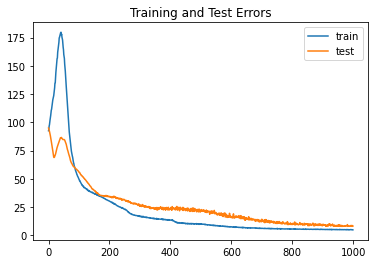

In [36]:
# plot training history
plt.plot(history.history['mean_absolute_percentage_error'], label='train')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='test')
plt.legend()
plt.title("Training and Test Errors")
plt.show()

# Hyperparameter tuning of neural network

In [37]:
import talos
from talos.model.hidden_layers import hidden_layers

Using TensorFlow backend.


In [39]:
p = {'lr': (0.1,0.5,10),
     'first_neuron':[10, 20],
     'hidden_layers':[1, 2, 3],
     'batch_size': (10,30,5),
     'kernel_initializer': ['he_normal'], #, 'uniform'
     'epochs': [500],
     'dropout': (0, 0.5, 5),
     'shapes':['brick','funnel'],
     'activation': ['relu'],
     'grid_downsample':[0.8], #value to something less than 1.00 which runs a random subset of possible combinations to save running time
     'last_activation':['linear'],
    }

**Funnel**
     
Funnel is the shape that roughly looks like an upside-dowm pyramind, so that the first layer is defined with max neurons, and the next layers are sligtly decreased compared to previous ones.

<img src='funnel.png' />

**Brick**

All the layers have first_neuron value. Called by shape='brick'.

<img src='brick.png' />

In [40]:
def stock_prediction_model(x_train, y_train, x_val, y_val, params):

    # next we can build the model exactly like we would normally do it
    model = Sequential()
    model.add(Dense(params['first_neuron'], input_dim=x_train.shape[1],
                    activation='relu',
                    kernel_initializer='he_normal'))
    
    model.add(Dropout(params['dropout']))
    
    # if we want to also test for number of layers and shapes, that's possible
#     hidden_layers(model, params, 1)
   
    # then we finish again with completely standard Keras way
    model.add(Dense(1, activation='relu',
                    kernel_initializer='he_normal'))
    
    model.compile(loss='mean_squared_error',
#                   optimizer=RMSprop(learning_rate=params['lr']),
                  optimizer='rmsprop',
                  metrics=['mape'])
    
    history = model.fit(x_train, y_train, 
                        validation_data=[x_val, y_val],
                        batch_size=params['batch_size'],
                        epochs=params['epochs'],
                        verbose=0)
    
    # finally we have to make sure that history object and model are returned
    return history, model

In [41]:
#scan is the same as model.fit!

t = talos.Scan(x=X_train,y=Y_train,
               x_val=X_val,y_val=Y_val,
                model=stock_prediction_model,
                params=p,
                print_params=True,
                experiment_name='stock_exp',
                fraction_limit=0.1)  #look to 10% of different configurations based on parameters! (for real app use 1)

  0%|                                                                                          | 0/300 [00:00<?, ?it/s]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.42000000000000004, 'shapes': 'brick'}


  0%|▎                                                                                 | 1/300 [00:09<48:36,  9.75s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.14, 'shapes': 'brick'}


  1%|▌                                                                                 | 2/300 [00:15<41:56,  8.45s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.14, 'shapes': 'funnel'}


  1%|▊                                                                                 | 3/300 [00:20<37:20,  7.54s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.38, 'shapes': 'funnel'}


  1%|█                                                                                 | 4/300 [00:27<36:47,  7.46s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.26, 'shapes': 'funnel'}


  2%|█▎                                                                                | 5/300 [00:32<32:33,  6.62s/it]

{'activation': 'relu', 'batch_size': 18, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.26, 'shapes': 'funnel'}


  2%|█▋                                                                                | 6/300 [00:39<32:22,  6.61s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.4600000000000001, 'shapes': 'brick'}


  2%|█▉                                                                                | 7/300 [00:43<29:18,  6.00s/it]

{'activation': 'relu', 'batch_size': 18, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.3400000000000001, 'shapes': 'brick'}


  3%|██▏                                                                               | 8/300 [00:50<29:55,  6.15s/it]

{'activation': 'relu', 'batch_size': 18, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.38, 'shapes': 'funnel'}


  3%|██▍                                                                               | 9/300 [00:56<29:51,  6.16s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.2, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.42000000000000004, 'shapes': 'brick'}


  3%|██▋                                                                              | 10/300 [01:01<28:56,  5.99s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.30000000000000004, 'shapes': 'brick'}


  4%|██▉                                                                              | 11/300 [01:11<33:48,  7.02s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.14, 'shapes': 'brick'}


  4%|███▏                                                                             | 12/300 [01:16<31:32,  6.57s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.42000000000000004, 'shapes': 'brick'}


  4%|███▌                                                                             | 13/300 [01:26<35:33,  7.44s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.2, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.26, 'shapes': 'brick'}


  5%|███▊                                                                             | 14/300 [01:36<38:57,  8.17s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.22000000000000003, 'shapes': 'funnel'}


  5%|████                                                                             | 15/300 [01:41<34:55,  7.35s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.4600000000000001, 'shapes': 'brick'}


  5%|████▎                                                                            | 16/300 [01:49<35:43,  7.55s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.42000000000000004, 'shapes': 'brick'}


  6%|████▌                                                                            | 17/300 [01:59<38:59,  8.27s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.2, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.4600000000000001, 'shapes': 'brick'}


  6%|████▊                                                                            | 18/300 [02:04<33:52,  7.21s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.2, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.3400000000000001, 'shapes': 'brick'}


  6%|█████▏                                                                           | 19/300 [02:09<30:51,  6.59s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.42000000000000004, 'shapes': 'funnel'}


  7%|█████▍                                                                           | 20/300 [02:17<32:30,  6.97s/it]

{'activation': 'relu', 'batch_size': 18, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.3400000000000001, 'shapes': 'funnel'}


  7%|█████▋                                                                           | 21/300 [02:23<31:44,  6.83s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.2, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.1, 'shapes': 'brick'}


  7%|█████▉                                                                           | 22/300 [02:31<32:47,  7.08s/it]

{'activation': 'relu', 'batch_size': 18, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.22000000000000003, 'shapes': 'funnel'}


  8%|██████▏                                                                          | 23/300 [02:37<31:47,  6.89s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.38, 'shapes': 'funnel'}


  8%|██████▍                                                                          | 24/300 [02:46<33:59,  7.39s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.30000000000000004, 'shapes': 'brick'}


  8%|██████▊                                                                          | 25/300 [02:54<34:26,  7.51s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.42000000000000004, 'shapes': 'brick'}


  9%|███████                                                                          | 26/300 [03:03<37:12,  8.15s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.3400000000000001, 'shapes': 'brick'}


  9%|███████▎                                                                         | 27/300 [03:11<36:40,  8.06s/it]

{'activation': 'relu', 'batch_size': 18, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.1, 'shapes': 'funnel'}


  9%|███████▌                                                                         | 28/300 [03:19<36:15,  8.00s/it]

{'activation': 'relu', 'batch_size': 18, 'dropout': 0.2, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.38, 'shapes': 'funnel'}


 10%|███████▊                                                                         | 29/300 [03:26<34:59,  7.75s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.18000000000000002, 'shapes': 'funnel'}


 10%|████████                                                                         | 30/300 [03:32<31:46,  7.06s/it]

{'activation': 'relu', 'batch_size': 18, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.4600000000000001, 'shapes': 'brick'}


 10%|████████▎                                                                        | 31/300 [03:39<32:29,  7.25s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.2, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.14, 'shapes': 'funnel'}


 11%|████████▋                                                                        | 32/300 [03:48<34:18,  7.68s/it]

{'activation': 'relu', 'batch_size': 18, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.30000000000000004, 'shapes': 'brick'}


 11%|████████▉                                                                        | 33/300 [03:55<33:00,  7.42s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.26, 'shapes': 'brick'}


 11%|█████████▏                                                                       | 34/300 [04:01<30:31,  6.89s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.38, 'shapes': 'brick'}


 12%|█████████▍                                                                       | 35/300 [04:06<28:51,  6.54s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.26, 'shapes': 'funnel'}


 12%|█████████▋                                                                       | 36/300 [04:14<29:54,  6.80s/it]

{'activation': 'relu', 'batch_size': 18, 'dropout': 0.2, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.42000000000000004, 'shapes': 'brick'}


 12%|█████████▉                                                                       | 37/300 [04:20<28:59,  6.61s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.42000000000000004, 'shapes': 'funnel'}


 13%|██████████▎                                                                      | 38/300 [04:27<29:50,  6.83s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.2, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.42000000000000004, 'shapes': 'brick'}


 13%|██████████▌                                                                      | 39/300 [04:32<26:52,  6.18s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.38, 'shapes': 'funnel'}


 13%|██████████▊                                                                      | 40/300 [04:37<24:52,  5.74s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.26, 'shapes': 'brick'}


 14%|███████████                                                                      | 41/300 [04:46<29:18,  6.79s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.4600000000000001, 'shapes': 'funnel'}


 14%|███████████▎                                                                     | 42/300 [04:53<30:00,  6.98s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.14, 'shapes': 'funnel'}


 14%|███████████▌                                                                     | 43/300 [05:02<32:34,  7.60s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.26, 'shapes': 'brick'}


 15%|███████████▉                                                                     | 44/300 [05:07<28:47,  6.75s/it]

{'activation': 'relu', 'batch_size': 18, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.1, 'shapes': 'brick'}


 15%|████████████▏                                                                    | 45/300 [05:13<28:04,  6.61s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.18000000000000002, 'shapes': 'brick'}


 15%|████████████▍                                                                    | 46/300 [05:21<28:44,  6.79s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.4600000000000001, 'shapes': 'brick'}


 16%|████████████▋                                                                    | 47/300 [05:26<26:57,  6.39s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.18000000000000002, 'shapes': 'funnel'}


 16%|████████████▉                                                                    | 48/300 [05:33<27:54,  6.65s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.26, 'shapes': 'funnel'}


 16%|█████████████▏                                                                   | 49/300 [05:41<29:13,  6.99s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.18000000000000002, 'shapes': 'brick'}


 17%|█████████████▌                                                                   | 50/300 [05:48<29:34,  7.10s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.22000000000000003, 'shapes': 'funnel'}


 17%|█████████████▊                                                                   | 51/300 [05:57<31:34,  7.61s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.2, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.22000000000000003, 'shapes': 'brick'}


 17%|██████████████                                                                   | 52/300 [06:02<27:52,  6.74s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.30000000000000004, 'shapes': 'funnel'}


 18%|██████████████▎                                                                  | 53/300 [06:10<28:44,  6.98s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.38, 'shapes': 'funnel'}


 18%|██████████████▌                                                                  | 54/300 [06:15<26:40,  6.51s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.3400000000000001, 'shapes': 'brick'}


 18%|██████████████▊                                                                  | 55/300 [06:20<24:40,  6.04s/it]

{'activation': 'relu', 'batch_size': 18, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.22000000000000003, 'shapes': 'funnel'}


 19%|███████████████                                                                  | 56/300 [06:26<25:12,  6.20s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.4600000000000001, 'shapes': 'brick'}


 19%|███████████████▍                                                                 | 57/300 [06:36<29:24,  7.26s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.38, 'shapes': 'funnel'}


 19%|███████████████▋                                                                 | 58/300 [06:41<26:11,  6.49s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.26, 'shapes': 'brick'}


 20%|███████████████▉                                                                 | 59/300 [06:47<25:06,  6.25s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.38, 'shapes': 'brick'}


 20%|████████████████▏                                                                | 60/300 [06:56<28:54,  7.23s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.38, 'shapes': 'brick'}


 20%|████████████████▍                                                                | 61/300 [07:01<25:40,  6.44s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.3400000000000001, 'shapes': 'brick'}


 21%|████████████████▋                                                                | 62/300 [07:08<27:01,  6.81s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.4600000000000001, 'shapes': 'brick'}


 21%|█████████████████                                                                | 63/300 [07:13<24:23,  6.18s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.38, 'shapes': 'brick'}


 21%|█████████████████▎                                                               | 64/300 [07:18<22:35,  5.74s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.2, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.42000000000000004, 'shapes': 'funnel'}


 22%|█████████████████▌                                                               | 65/300 [07:23<22:12,  5.67s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.18000000000000002, 'shapes': 'brick'}


 22%|█████████████████▊                                                               | 66/300 [07:28<21:29,  5.51s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.22000000000000003, 'shapes': 'funnel'}


 22%|██████████████████                                                               | 67/300 [07:38<25:34,  6.59s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.18000000000000002, 'shapes': 'funnel'}


 23%|██████████████████▎                                                              | 68/300 [07:43<23:42,  6.13s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.4600000000000001, 'shapes': 'brick'}


 23%|██████████████████▋                                                              | 69/300 [07:47<21:56,  5.70s/it]

{'activation': 'relu', 'batch_size': 18, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.22000000000000003, 'shapes': 'funnel'}


 23%|██████████████████▉                                                              | 70/300 [07:54<22:41,  5.92s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.14, 'shapes': 'funnel'}


 24%|███████████████████▏                                                             | 71/300 [07:59<22:12,  5.82s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.3400000000000001, 'shapes': 'brick'}


 24%|███████████████████▍                                                             | 72/300 [08:04<20:56,  5.51s/it]

{'activation': 'relu', 'batch_size': 18, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.22000000000000003, 'shapes': 'brick'}


 24%|███████████████████▋                                                             | 73/300 [08:10<21:45,  5.75s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.1, 'shapes': 'funnel'}


 25%|███████████████████▉                                                             | 74/300 [08:16<21:17,  5.65s/it]

{'activation': 'relu', 'batch_size': 18, 'dropout': 0.2, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.22000000000000003, 'shapes': 'brick'}


 25%|████████████████████▎                                                            | 75/300 [08:22<22:02,  5.88s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.1, 'shapes': 'brick'}


 25%|████████████████████▌                                                            | 76/300 [08:28<21:43,  5.82s/it]

{'activation': 'relu', 'batch_size': 18, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.18000000000000002, 'shapes': 'funnel'}


 26%|████████████████████▊                                                            | 77/300 [08:34<22:05,  5.95s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.2, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.3400000000000001, 'shapes': 'funnel'}


 26%|█████████████████████                                                            | 78/300 [08:44<26:30,  7.16s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.38, 'shapes': 'funnel'}


 26%|█████████████████████▎                                                           | 79/300 [08:54<28:50,  7.83s/it]

{'activation': 'relu', 'batch_size': 18, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.26, 'shapes': 'brick'}


 27%|█████████████████████▌                                                           | 80/300 [09:00<26:41,  7.28s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.2, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.26, 'shapes': 'brick'}


 27%|█████████████████████▊                                                           | 81/300 [09:04<23:55,  6.56s/it]

{'activation': 'relu', 'batch_size': 18, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.4600000000000001, 'shapes': 'funnel'}


 27%|██████████████████████▏                                                          | 82/300 [09:11<23:39,  6.51s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.38, 'shapes': 'brick'}


 28%|██████████████████████▍                                                          | 83/300 [09:18<24:41,  6.83s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.14, 'shapes': 'brick'}


 28%|██████████████████████▋                                                          | 84/300 [09:26<25:30,  7.08s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.38, 'shapes': 'funnel'}


 28%|██████████████████████▉                                                          | 85/300 [09:31<22:46,  6.36s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.22000000000000003, 'shapes': 'funnel'}


 29%|███████████████████████▏                                                         | 86/300 [09:36<21:01,  5.90s/it]

{'activation': 'relu', 'batch_size': 18, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.30000000000000004, 'shapes': 'funnel'}


 29%|███████████████████████▍                                                         | 87/300 [09:42<21:42,  6.11s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.2, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.14, 'shapes': 'funnel'}


 29%|███████████████████████▊                                                         | 88/300 [09:49<21:54,  6.20s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.1, 'shapes': 'funnel'}


 30%|████████████████████████                                                         | 89/300 [09:55<21:41,  6.17s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.22000000000000003, 'shapes': 'brick'}


 30%|████████████████████████▎                                                        | 90/300 [10:00<20:56,  5.98s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.1, 'shapes': 'funnel'}


 30%|████████████████████████▌                                                        | 91/300 [10:08<22:29,  6.46s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.14, 'shapes': 'brick'}


 31%|████████████████████████▊                                                        | 92/300 [10:15<23:11,  6.69s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.4600000000000001, 'shapes': 'brick'}


 31%|█████████████████████████                                                        | 93/300 [10:24<25:37,  7.43s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.26, 'shapes': 'brick'}


 31%|█████████████████████████▍                                                       | 94/300 [10:29<22:37,  6.59s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.42000000000000004, 'shapes': 'funnel'}


 32%|█████████████████████████▋                                                       | 95/300 [10:34<21:31,  6.30s/it]

{'activation': 'relu', 'batch_size': 18, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.4600000000000001, 'shapes': 'brick'}


 32%|█████████████████████████▉                                                       | 96/300 [10:40<21:12,  6.24s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.38, 'shapes': 'brick'}


 32%|██████████████████████████▏                                                      | 97/300 [10:48<22:08,  6.55s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.14, 'shapes': 'funnel'}


 33%|██████████████████████████▍                                                      | 98/300 [10:57<24:49,  7.37s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.22000000000000003, 'shapes': 'funnel'}


 33%|██████████████████████████▋                                                      | 99/300 [11:05<24:56,  7.45s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.3400000000000001, 'shapes': 'brick'}


 33%|██████████████████████████▋                                                     | 100/300 [11:10<22:13,  6.67s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.30000000000000004, 'shapes': 'brick'}


 34%|██████████████████████████▉                                                     | 101/300 [11:14<20:13,  6.10s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.38, 'shapes': 'funnel'}


 34%|███████████████████████████▏                                                    | 102/300 [11:24<23:19,  7.07s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.1, 'shapes': 'brick'}


 34%|███████████████████████████▍                                                    | 103/300 [11:28<20:52,  6.36s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.22000000000000003, 'shapes': 'funnel'}


 35%|███████████████████████████▋                                                    | 104/300 [11:37<23:29,  7.19s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.4600000000000001, 'shapes': 'brick'}


 35%|████████████████████████████                                                    | 105/300 [11:42<21:04,  6.48s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.2, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.42000000000000004, 'shapes': 'funnel'}


 35%|████████████████████████████▎                                                   | 106/300 [11:50<22:14,  6.88s/it]

{'activation': 'relu', 'batch_size': 18, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.26, 'shapes': 'funnel'}


 36%|████████████████████████████▌                                                   | 107/300 [11:57<21:56,  6.82s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.2, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.26, 'shapes': 'brick'}


 36%|████████████████████████████▊                                                   | 108/300 [12:02<20:35,  6.44s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.18000000000000002, 'shapes': 'brick'}


 36%|█████████████████████████████                                                   | 109/300 [12:07<18:49,  5.92s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.2, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.22000000000000003, 'shapes': 'brick'}


 37%|█████████████████████████████▎                                                  | 110/300 [12:15<20:23,  6.44s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.2, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.18000000000000002, 'shapes': 'funnel'}


 37%|█████████████████████████████▌                                                  | 111/300 [12:19<18:35,  5.90s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.4600000000000001, 'shapes': 'brick'}


 37%|█████████████████████████████▊                                                  | 112/300 [12:24<17:29,  5.58s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.22000000000000003, 'shapes': 'funnel'}


 38%|██████████████████████████████▏                                                 | 113/300 [12:30<17:17,  5.55s/it]

{'activation': 'relu', 'batch_size': 18, 'dropout': 0.2, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.14, 'shapes': 'funnel'}


 38%|██████████████████████████████▍                                                 | 114/300 [12:36<17:59,  5.80s/it]

{'activation': 'relu', 'batch_size': 18, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.22000000000000003, 'shapes': 'funnel'}


 38%|██████████████████████████████▋                                                 | 115/300 [12:42<18:18,  5.94s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.22000000000000003, 'shapes': 'brick'}


 39%|██████████████████████████████▉                                                 | 116/300 [12:48<17:38,  5.75s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.30000000000000004, 'shapes': 'funnel'}


 39%|███████████████████████████████▏                                                | 117/300 [12:56<20:19,  6.67s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.18000000000000002, 'shapes': 'brick'}


 39%|███████████████████████████████▍                                                | 118/300 [13:02<19:07,  6.30s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.22000000000000003, 'shapes': 'funnel'}


 40%|███████████████████████████████▋                                                | 119/300 [13:11<21:48,  7.23s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.22000000000000003, 'shapes': 'funnel'}


 40%|████████████████████████████████                                                | 120/300 [13:17<20:03,  6.68s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.2, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.30000000000000004, 'shapes': 'funnel'}


 40%|████████████████████████████████▎                                               | 121/300 [13:22<18:57,  6.36s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.22000000000000003, 'shapes': 'funnel'}


 41%|████████████████████████████████▌                                               | 122/300 [13:32<21:32,  7.26s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.26, 'shapes': 'funnel'}


 41%|████████████████████████████████▊                                               | 123/300 [13:36<19:06,  6.48s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.4600000000000001, 'shapes': 'funnel'}


 41%|█████████████████████████████████                                               | 124/300 [13:41<17:23,  5.93s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.2, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.42000000000000004, 'shapes': 'brick'}


 42%|█████████████████████████████████▎                                              | 125/300 [13:48<18:40,  6.40s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.4600000000000001, 'shapes': 'funnel'}


 42%|█████████████████████████████████▌                                              | 126/300 [13:58<21:10,  7.30s/it]

{'activation': 'relu', 'batch_size': 18, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.42000000000000004, 'shapes': 'brick'}


 42%|█████████████████████████████████▊                                              | 127/300 [14:04<20:18,  7.04s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.26, 'shapes': 'funnel'}


 43%|██████████████████████████████████▏                                             | 128/300 [14:09<18:11,  6.35s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.22000000000000003, 'shapes': 'brick'}


 43%|██████████████████████████████████▍                                             | 129/300 [14:18<20:36,  7.23s/it]

{'activation': 'relu', 'batch_size': 18, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.1, 'shapes': 'brick'}


 43%|██████████████████████████████████▋                                             | 130/300 [14:25<19:56,  7.04s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.42000000000000004, 'shapes': 'funnel'}


 44%|██████████████████████████████████▉                                             | 131/300 [14:30<17:47,  6.31s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.1, 'shapes': 'funnel'}


 44%|███████████████████████████████████▏                                            | 132/300 [14:34<16:24,  5.86s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.1, 'shapes': 'brick'}


 44%|███████████████████████████████████▍                                            | 133/300 [14:42<17:39,  6.34s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.3400000000000001, 'shapes': 'funnel'}


 45%|███████████████████████████████████▋                                            | 134/300 [14:47<16:17,  5.89s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.2, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.14, 'shapes': 'brick'}


 45%|████████████████████████████████████                                            | 135/300 [14:52<15:22,  5.59s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.38, 'shapes': 'funnel'}


 45%|████████████████████████████████████▎                                           | 136/300 [14:56<14:35,  5.34s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.3400000000000001, 'shapes': 'brick'}


 46%|████████████████████████████████████▌                                           | 137/300 [15:02<14:51,  5.47s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.3400000000000001, 'shapes': 'brick'}


 46%|████████████████████████████████████▊                                           | 138/300 [15:08<14:51,  5.51s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.4600000000000001, 'shapes': 'funnel'}


 46%|█████████████████████████████████████                                           | 139/300 [15:17<17:57,  6.69s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.30000000000000004, 'shapes': 'brick'}


 47%|█████████████████████████████████████▎                                          | 140/300 [15:22<16:12,  6.08s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.14, 'shapes': 'funnel'}


 47%|█████████████████████████████████████▌                                          | 141/300 [15:27<15:34,  5.88s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.4600000000000001, 'shapes': 'funnel'}


 47%|█████████████████████████████████████▊                                          | 142/300 [15:35<16:46,  6.37s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.14, 'shapes': 'brick'}


 48%|██████████████████████████████████████▏                                         | 143/300 [15:44<19:05,  7.30s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.1, 'shapes': 'brick'}


 48%|██████████████████████████████████████▍                                         | 144/300 [15:50<17:46,  6.84s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.3400000000000001, 'shapes': 'brick'}


 48%|██████████████████████████████████████▋                                         | 145/300 [15:59<19:28,  7.54s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.30000000000000004, 'shapes': 'funnel'}


 49%|██████████████████████████████████████▉                                         | 146/300 [16:07<19:25,  7.57s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.4600000000000001, 'shapes': 'funnel'}


 49%|███████████████████████████████████████▏                                        | 147/300 [16:14<19:22,  7.60s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.18000000000000002, 'shapes': 'brick'}


 49%|███████████████████████████████████████▍                                        | 148/300 [16:22<18:57,  7.49s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.22000000000000003, 'shapes': 'brick'}


 50%|███████████████████████████████████████▋                                        | 149/300 [16:31<20:04,  7.98s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.3400000000000001, 'shapes': 'funnel'}


 50%|████████████████████████████████████████                                        | 150/300 [16:40<21:02,  8.42s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.2, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.22000000000000003, 'shapes': 'funnel'}


 50%|████████████████████████████████████████▎                                       | 151/300 [16:48<20:14,  8.15s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.22000000000000003, 'shapes': 'funnel'}


 51%|████████████████████████████████████████▌                                       | 152/300 [16:53<17:40,  7.17s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.26, 'shapes': 'funnel'}


 51%|████████████████████████████████████████▊                                       | 153/300 [17:02<19:09,  7.82s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.14, 'shapes': 'funnel'}


 51%|█████████████████████████████████████████                                       | 154/300 [17:11<20:13,  8.31s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.30000000000000004, 'shapes': 'brick'}


 52%|█████████████████████████████████████████▎                                      | 155/300 [17:19<19:55,  8.25s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.2, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.3400000000000001, 'shapes': 'funnel'}


 52%|█████████████████████████████████████████▌                                      | 156/300 [17:29<20:39,  8.61s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.42000000000000004, 'shapes': 'brick'}


 52%|█████████████████████████████████████████▊                                      | 157/300 [17:34<17:41,  7.42s/it]

{'activation': 'relu', 'batch_size': 18, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.22000000000000003, 'shapes': 'brick'}


 53%|██████████████████████████████████████████▏                                     | 158/300 [17:40<16:50,  7.11s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.30000000000000004, 'shapes': 'brick'}


 53%|██████████████████████████████████████████▍                                     | 159/300 [17:49<18:15,  7.77s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.38, 'shapes': 'brick'}


 53%|██████████████████████████████████████████▋                                     | 160/300 [17:55<16:35,  7.11s/it]

{'activation': 'relu', 'batch_size': 18, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.22000000000000003, 'shapes': 'brick'}


 54%|██████████████████████████████████████████▉                                     | 161/300 [18:01<15:51,  6.84s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.14, 'shapes': 'brick'}


 54%|███████████████████████████████████████████▏                                    | 162/300 [18:07<14:55,  6.49s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.18000000000000002, 'shapes': 'funnel'}


 54%|███████████████████████████████████████████▍                                    | 163/300 [18:12<13:58,  6.12s/it]

{'activation': 'relu', 'batch_size': 18, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.22000000000000003, 'shapes': 'funnel'}


 55%|███████████████████████████████████████████▋                                    | 164/300 [18:18<14:02,  6.19s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.26, 'shapes': 'brick'}


 55%|████████████████████████████████████████████                                    | 165/300 [18:23<12:59,  5.78s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.1, 'shapes': 'brick'}


 55%|████████████████████████████████████████████▎                                   | 166/300 [18:28<12:35,  5.64s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.2, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.18000000000000002, 'shapes': 'brick'}


 56%|████████████████████████████████████████████▌                                   | 167/300 [18:34<12:28,  5.63s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.38, 'shapes': 'funnel'}


 56%|████████████████████████████████████████████▊                                   | 168/300 [18:42<13:41,  6.23s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.18000000000000002, 'shapes': 'brick'}


 56%|█████████████████████████████████████████████                                   | 169/300 [18:46<12:32,  5.74s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.38, 'shapes': 'brick'}


 57%|█████████████████████████████████████████████▎                                  | 170/300 [18:52<12:25,  5.74s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.26, 'shapes': 'brick'}


 57%|█████████████████████████████████████████████▌                                  | 171/300 [19:00<13:30,  6.28s/it]

{'activation': 'relu', 'batch_size': 18, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.30000000000000004, 'shapes': 'funnel'}


 57%|█████████████████████████████████████████████▊                                  | 172/300 [19:06<13:43,  6.44s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.38, 'shapes': 'funnel'}


 58%|██████████████████████████████████████████████▏                                 | 173/300 [19:16<15:27,  7.30s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.2, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.38, 'shapes': 'brick'}


 58%|██████████████████████████████████████████████▍                                 | 174/300 [19:23<15:37,  7.44s/it]

{'activation': 'relu', 'batch_size': 18, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.30000000000000004, 'shapes': 'brick'}


 58%|██████████████████████████████████████████████▋                                 | 175/300 [19:30<14:50,  7.12s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.2, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.42000000000000004, 'shapes': 'funnel'}


 59%|██████████████████████████████████████████████▉                                 | 176/300 [19:39<15:59,  7.74s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.26, 'shapes': 'brick'}


 59%|███████████████████████████████████████████████▏                                | 177/300 [19:44<13:56,  6.80s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.1, 'shapes': 'funnel'}


 59%|███████████████████████████████████████████████▍                                | 178/300 [19:51<14:22,  7.07s/it]

{'activation': 'relu', 'batch_size': 18, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.1, 'shapes': 'funnel'}


 60%|███████████████████████████████████████████████▋                                | 179/300 [19:58<13:53,  6.89s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.22000000000000003, 'shapes': 'brick'}


 60%|████████████████████████████████████████████████                                | 180/300 [20:05<14:14,  7.12s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.30000000000000004, 'shapes': 'brick'}


 60%|████████████████████████████████████████████████▎                               | 181/300 [20:10<12:38,  6.37s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.26, 'shapes': 'brick'}


 61%|████████████████████████████████████████████████▌                               | 182/300 [20:19<14:15,  7.25s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.1, 'shapes': 'brick'}


 61%|████████████████████████████████████████████████▊                               | 183/300 [20:27<14:18,  7.34s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.2, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.3400000000000001, 'shapes': 'brick'}


 61%|█████████████████████████████████████████████████                               | 184/300 [20:35<14:21,  7.42s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.3400000000000001, 'shapes': 'funnel'}


 62%|█████████████████████████████████████████████████▎                              | 185/300 [20:44<15:22,  8.02s/it]

{'activation': 'relu', 'batch_size': 18, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.4600000000000001, 'shapes': 'funnel'}


 62%|█████████████████████████████████████████████████▌                              | 186/300 [20:50<14:19,  7.54s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.30000000000000004, 'shapes': 'funnel'}


 62%|█████████████████████████████████████████████████▊                              | 187/300 [20:58<14:11,  7.54s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.30000000000000004, 'shapes': 'funnel'}


 63%|██████████████████████████████████████████████████▏                             | 188/300 [21:07<15:05,  8.09s/it]

{'activation': 'relu', 'batch_size': 18, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.22000000000000003, 'shapes': 'funnel'}


 63%|██████████████████████████████████████████████████▍                             | 189/300 [21:13<13:55,  7.53s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.38, 'shapes': 'brick'}


 63%|██████████████████████████████████████████████████▋                             | 190/300 [21:23<14:39,  8.00s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.22000000000000003, 'shapes': 'brick'}


 64%|██████████████████████████████████████████████████▉                             | 191/300 [21:32<15:02,  8.28s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.22000000000000003, 'shapes': 'funnel'}


 64%|███████████████████████████████████████████████████▏                            | 192/300 [21:37<13:24,  7.45s/it]

{'activation': 'relu', 'batch_size': 18, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.22000000000000003, 'shapes': 'brick'}


 64%|███████████████████████████████████████████████████▍                            | 193/300 [21:43<12:32,  7.03s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.2, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.30000000000000004, 'shapes': 'brick'}


 65%|███████████████████████████████████████████████████▋                            | 194/300 [21:51<12:38,  7.16s/it]

{'activation': 'relu', 'batch_size': 18, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.26, 'shapes': 'funnel'}


 65%|████████████████████████████████████████████████████                            | 195/300 [21:57<12:20,  7.05s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.4600000000000001, 'shapes': 'funnel'}


 65%|████████████████████████████████████████████████████▎                           | 196/300 [22:06<13:10,  7.60s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.2, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.42000000000000004, 'shapes': 'funnel'}


 66%|████████████████████████████████████████████████████▌                           | 197/300 [22:11<11:33,  6.73s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.2, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.22000000000000003, 'shapes': 'funnel'}


 66%|████████████████████████████████████████████████████▊                           | 198/300 [22:20<12:51,  7.56s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.2, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.4600000000000001, 'shapes': 'funnel'}


 66%|█████████████████████████████████████████████████████                           | 199/300 [22:28<12:47,  7.60s/it]

{'activation': 'relu', 'batch_size': 18, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.1, 'shapes': 'brick'}


 67%|█████████████████████████████████████████████████████▎                          | 200/300 [22:34<11:52,  7.13s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.4600000000000001, 'shapes': 'brick'}


 67%|█████████████████████████████████████████████████████▌                          | 201/300 [22:39<10:30,  6.37s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.3400000000000001, 'shapes': 'brick'}


 67%|█████████████████████████████████████████████████████▊                          | 202/300 [22:43<09:34,  5.86s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.30000000000000004, 'shapes': 'funnel'}


 68%|██████████████████████████████████████████████████████▏                         | 203/300 [22:48<08:51,  5.47s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.38, 'shapes': 'brick'}


 68%|██████████████████████████████████████████████████████▍                         | 204/300 [22:57<10:15,  6.41s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.2, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.38, 'shapes': 'funnel'}


 68%|██████████████████████████████████████████████████████▋                         | 205/300 [23:07<11:58,  7.57s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.42000000000000004, 'shapes': 'brick'}


 69%|██████████████████████████████████████████████████████▉                         | 206/300 [23:13<10:57,  7.00s/it]

{'activation': 'relu', 'batch_size': 18, 'dropout': 0.2, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.18000000000000002, 'shapes': 'brick'}


 69%|███████████████████████████████████████████████████████▏                        | 207/300 [23:19<10:32,  6.81s/it]

{'activation': 'relu', 'batch_size': 18, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.22000000000000003, 'shapes': 'funnel'}


 69%|███████████████████████████████████████████████████████▍                        | 208/300 [23:25<10:14,  6.68s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.2, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.4600000000000001, 'shapes': 'funnel'}


 70%|███████████████████████████████████████████████████████▋                        | 209/300 [23:30<09:15,  6.10s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.4600000000000001, 'shapes': 'funnel'}


 70%|████████████████████████████████████████████████████████                        | 210/300 [23:36<08:52,  5.92s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.4600000000000001, 'shapes': 'brick'}


 70%|████████████████████████████████████████████████████████▎                       | 211/300 [23:45<10:13,  6.90s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.14, 'shapes': 'brick'}


 71%|████████████████████████████████████████████████████████▌                       | 212/300 [23:49<09:07,  6.23s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.38, 'shapes': 'brick'}


 71%|████████████████████████████████████████████████████████▊                       | 213/300 [23:57<09:33,  6.59s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.2, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.14, 'shapes': 'brick'}


 71%|█████████████████████████████████████████████████████████                       | 214/300 [24:06<10:38,  7.42s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.3400000000000001, 'shapes': 'funnel'}


 72%|█████████████████████████████████████████████████████████▎                      | 215/300 [24:16<11:31,  8.13s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.4600000000000001, 'shapes': 'brick'}


 72%|█████████████████████████████████████████████████████████▌                      | 216/300 [24:21<09:57,  7.12s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.26, 'shapes': 'funnel'}


 72%|█████████████████████████████████████████████████████████▊                      | 217/300 [24:26<08:54,  6.44s/it]

{'activation': 'relu', 'batch_size': 18, 'dropout': 0.2, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.14, 'shapes': 'funnel'}


 73%|██████████████████████████████████████████████████████████▏                     | 218/300 [24:32<08:46,  6.42s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.26, 'shapes': 'brick'}


 73%|██████████████████████████████████████████████████████████▍                     | 219/300 [24:41<09:47,  7.26s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.30000000000000004, 'shapes': 'funnel'}


 73%|██████████████████████████████████████████████████████████▋                     | 220/300 [24:49<09:46,  7.33s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.38, 'shapes': 'brick'}


 74%|██████████████████████████████████████████████████████████▉                     | 221/300 [24:53<08:36,  6.54s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.3400000000000001, 'shapes': 'funnel'}


 74%|███████████████████████████████████████████████████████████▏                    | 222/300 [25:02<09:25,  7.24s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.38, 'shapes': 'funnel'}


 74%|███████████████████████████████████████████████████████████▍                    | 223/300 [25:07<08:24,  6.55s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.38, 'shapes': 'funnel'}


 75%|███████████████████████████████████████████████████████████▋                    | 224/300 [25:16<09:11,  7.25s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.1, 'shapes': 'funnel'}


 75%|████████████████████████████████████████████████████████████                    | 225/300 [25:21<08:06,  6.48s/it]

{'activation': 'relu', 'batch_size': 18, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.26, 'shapes': 'funnel'}


 75%|████████████████████████████████████████████████████████████▎                   | 226/300 [25:27<07:51,  6.37s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.2, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.4600000000000001, 'shapes': 'brick'}


 76%|████████████████████████████████████████████████████████████▌                   | 227/300 [25:32<07:27,  6.13s/it]

{'activation': 'relu', 'batch_size': 18, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.14, 'shapes': 'funnel'}


 76%|████████████████████████████████████████████████████████████▊                   | 228/300 [25:39<07:35,  6.33s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.38, 'shapes': 'brick'}


 76%|█████████████████████████████████████████████████████████████                   | 229/300 [25:47<08:04,  6.82s/it]

{'activation': 'relu', 'batch_size': 18, 'dropout': 0.2, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.4600000000000001, 'shapes': 'brick'}


 77%|█████████████████████████████████████████████████████████████▎                  | 230/300 [25:53<07:44,  6.64s/it]

{'activation': 'relu', 'batch_size': 18, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.18000000000000002, 'shapes': 'funnel'}


 77%|█████████████████████████████████████████████████████████████▌                  | 231/300 [26:00<07:29,  6.52s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.14, 'shapes': 'funnel'}


 77%|█████████████████████████████████████████████████████████████▊                  | 232/300 [26:04<06:48,  6.01s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.26, 'shapes': 'funnel'}


 78%|██████████████████████████████████████████████████████████████▏                 | 233/300 [26:10<06:33,  5.87s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.1, 'shapes': 'brick'}


 78%|██████████████████████████████████████████████████████████████▍                 | 234/300 [26:18<07:02,  6.40s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.2, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.30000000000000004, 'shapes': 'brick'}


 78%|██████████████████████████████████████████████████████████████▋                 | 235/300 [26:25<07:20,  6.78s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.1, 'shapes': 'funnel'}


 79%|██████████████████████████████████████████████████████████████▉                 | 236/300 [26:30<06:33,  6.15s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.1, 'shapes': 'funnel'}


 79%|███████████████████████████████████████████████████████████████▏                | 237/300 [26:36<06:16,  5.98s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.30000000000000004, 'shapes': 'funnel'}


 79%|███████████████████████████████████████████████████████████████▍                | 238/300 [26:41<06:03,  5.86s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.26, 'shapes': 'funnel'}


 80%|███████████████████████████████████████████████████████████████▋                | 239/300 [26:49<06:29,  6.38s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.2, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.4600000000000001, 'shapes': 'funnel'}


 80%|████████████████████████████████████████████████████████████████                | 240/300 [26:58<07:19,  7.32s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.1, 'shapes': 'funnel'}


 80%|████████████████████████████████████████████████████████████████▎               | 241/300 [27:03<06:26,  6.56s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.3400000000000001, 'shapes': 'funnel'}


 81%|████████████████████████████████████████████████████████████████▌               | 242/300 [27:09<06:14,  6.45s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.3400000000000001, 'shapes': 'brick'}


 81%|████████████████████████████████████████████████████████████████▊               | 243/300 [27:14<05:36,  5.90s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.42000000000000004, 'shapes': 'funnel'}


 81%|█████████████████████████████████████████████████████████████████               | 244/300 [27:23<06:27,  6.91s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.38, 'shapes': 'brick'}


 82%|█████████████████████████████████████████████████████████████████▎              | 245/300 [27:28<05:54,  6.45s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.3400000000000001, 'shapes': 'funnel'}


 82%|█████████████████████████████████████████████████████████████████▌              | 246/300 [27:34<05:35,  6.21s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.2, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.22000000000000003, 'shapes': 'brick'}


 82%|█████████████████████████████████████████████████████████████████▊              | 247/300 [27:40<05:20,  6.05s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.38, 'shapes': 'brick'}


 83%|██████████████████████████████████████████████████████████████████▏             | 248/300 [27:49<06:05,  7.04s/it]

{'activation': 'relu', 'batch_size': 18, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.3400000000000001, 'shapes': 'brick'}


 83%|██████████████████████████████████████████████████████████████████▍             | 249/300 [27:56<05:51,  6.89s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.38, 'shapes': 'funnel'}


 83%|██████████████████████████████████████████████████████████████████▋             | 250/300 [28:05<06:19,  7.59s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.38, 'shapes': 'funnel'}


 84%|██████████████████████████████████████████████████████████████████▉             | 251/300 [28:14<06:38,  8.14s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.30000000000000004, 'shapes': 'funnel'}


 84%|███████████████████████████████████████████████████████████████████▏            | 252/300 [28:20<05:53,  7.37s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.14, 'shapes': 'funnel'}


 84%|███████████████████████████████████████████████████████████████████▍            | 253/300 [28:25<05:08,  6.57s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.2, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.3400000000000001, 'shapes': 'funnel'}


 85%|███████████████████████████████████████████████████████████████████▋            | 254/300 [28:32<05:15,  6.87s/it]

{'activation': 'relu', 'batch_size': 18, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.30000000000000004, 'shapes': 'funnel'}


 85%|████████████████████████████████████████████████████████████████████            | 255/300 [28:38<04:59,  6.66s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.42000000000000004, 'shapes': 'funnel'}


 85%|████████████████████████████████████████████████████████████████████▎           | 256/300 [28:44<04:35,  6.25s/it]

{'activation': 'relu', 'batch_size': 18, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.1, 'shapes': 'funnel'}


 86%|████████████████████████████████████████████████████████████████████▌           | 257/300 [28:50<04:29,  6.28s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.1, 'shapes': 'funnel'}


 86%|████████████████████████████████████████████████████████████████████▊           | 258/300 [28:55<04:03,  5.80s/it]

{'activation': 'relu', 'batch_size': 18, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.4600000000000001, 'shapes': 'funnel'}


 86%|█████████████████████████████████████████████████████████████████████           | 259/300 [29:01<04:07,  6.03s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.2, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.4600000000000001, 'shapes': 'brick'}


 87%|█████████████████████████████████████████████████████████████████████▎          | 260/300 [29:11<04:42,  7.07s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.2, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.18000000000000002, 'shapes': 'brick'}


 87%|█████████████████████████████████████████████████████████████████████▌          | 261/300 [29:20<05:04,  7.81s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.30000000000000004, 'shapes': 'funnel'}


 87%|█████████████████████████████████████████████████████████████████████▊          | 262/300 [29:30<05:18,  8.37s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.26, 'shapes': 'brick'}


 88%|██████████████████████████████████████████████████████████████████████▏         | 263/300 [29:36<04:40,  7.57s/it]

{'activation': 'relu', 'batch_size': 18, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.18000000000000002, 'shapes': 'brick'}


 88%|██████████████████████████████████████████████████████████████████████▍         | 264/300 [29:42<04:19,  7.20s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.1, 'shapes': 'funnel'}


 88%|██████████████████████████████████████████████████████████████████████▋         | 265/300 [29:51<04:29,  7.69s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.3400000000000001, 'shapes': 'brick'}


 89%|██████████████████████████████████████████████████████████████████████▉         | 266/300 [29:58<04:16,  7.54s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.26, 'shapes': 'brick'}


 89%|███████████████████████████████████████████████████████████████████████▏        | 267/300 [30:04<03:55,  7.15s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.38, 'shapes': 'funnel'}


 89%|███████████████████████████████████████████████████████████████████████▍        | 268/300 [30:14<04:12,  7.89s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.14, 'shapes': 'brick'}


 90%|███████████████████████████████████████████████████████████████████████▋        | 269/300 [30:19<03:35,  6.95s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.14, 'shapes': 'brick'}


 90%|████████████████████████████████████████████████████████████████████████        | 270/300 [30:28<03:51,  7.71s/it]

{'activation': 'relu', 'batch_size': 18, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.14, 'shapes': 'funnel'}


 90%|████████████████████████████████████████████████████████████████████████▎       | 271/300 [30:34<03:28,  7.19s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.2, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.42000000000000004, 'shapes': 'brick'}


 91%|████████████████████████████████████████████████████████████████████████▌       | 272/300 [30:39<03:00,  6.46s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.30000000000000004, 'shapes': 'funnel'}


 91%|████████████████████████████████████████████████████████████████████████▊       | 273/300 [30:48<03:14,  7.22s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.3400000000000001, 'shapes': 'funnel'}


 91%|█████████████████████████████████████████████████████████████████████████       | 274/300 [30:53<02:53,  6.69s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.1, 'shapes': 'funnel'}


 92%|█████████████████████████████████████████████████████████████████████████▎      | 275/300 [30:59<02:38,  6.34s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.38, 'shapes': 'funnel'}


 92%|█████████████████████████████████████████████████████████████████████████▌      | 276/300 [31:08<02:55,  7.30s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.30000000000000004, 'shapes': 'funnel'}


 92%|█████████████████████████████████████████████████████████████████████████▊      | 277/300 [31:14<02:36,  6.79s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.3400000000000001, 'shapes': 'brick'}


 93%|██████████████████████████████████████████████████████████████████████████▏     | 278/300 [31:20<02:21,  6.44s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.1, 'shapes': 'brick'}


 93%|██████████████████████████████████████████████████████████████████████████▍     | 279/300 [31:27<02:23,  6.82s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.42000000000000004, 'shapes': 'funnel'}


 93%|██████████████████████████████████████████████████████████████████████████▋     | 280/300 [31:35<02:19,  6.96s/it]

{'activation': 'relu', 'batch_size': 18, 'dropout': 0.2, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.22000000000000003, 'shapes': 'brick'}


 94%|██████████████████████████████████████████████████████████████████████████▉     | 281/300 [31:42<02:16,  7.20s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.42000000000000004, 'shapes': 'funnel'}


 94%|███████████████████████████████████████████████████████████████████████████▏    | 282/300 [31:48<02:02,  6.83s/it]

{'activation': 'relu', 'batch_size': 18, 'dropout': 0.2, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.38, 'shapes': 'brick'}


 94%|███████████████████████████████████████████████████████████████████████████▍    | 283/300 [32:00<02:21,  8.34s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.30000000000000004, 'shapes': 'brick'}


 95%|█████████████████████████████████████████████████████████████████████    | 284/300 [8:25:31<37:54:22, 8528.94s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.22000000000000003, 'shapes': 'brick'}


 95%|█████████████████████████████████████████████████████████████████████▎   | 285/300 [8:25:39<24:53:11, 5972.78s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.2, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.18000000000000002, 'shapes': 'brick'}


 95%|█████████████████████████████████████████████████████████████████████▌   | 286/300 [8:25:46<16:16:01, 4182.98s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.18000000000000002, 'shapes': 'brick'}


 96%|█████████████████████████████████████████████████████████████████████▊   | 287/300 [8:25:53<10:34:53, 2930.30s/it]

{'activation': 'relu', 'batch_size': 18, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.14, 'shapes': 'funnel'}


 96%|███████████████████████████████████████████████████████████████████████   | 288/300 [8:26:01<6:50:41, 2053.49s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.38, 'shapes': 'funnel'}


 96%|███████████████████████████████████████████████████████████████████████▎  | 289/300 [8:26:11<4:24:07, 1440.66s/it]

{'activation': 'relu', 'batch_size': 26, 'dropout': 0.2, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.4600000000000001, 'shapes': 'brick'}


 97%|███████████████████████████████████████████████████████████████████████▌  | 290/300 [8:26:16<2:48:19, 1009.93s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.3400000000000001, 'shapes': 'funnel'}


 97%|████████████████████████████████████████████████████████████████████████▊  | 291/300 [8:26:23<1:46:19, 708.87s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.4, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 1, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.3400000000000001, 'shapes': 'funnel'}


 97%|█████████████████████████████████████████████████████████████████████████  | 292/300 [8:26:31<1:06:29, 498.63s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.2, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.26, 'shapes': 'funnel'}


 98%|███████████████████████████████████████████████████████████████████████████▏ | 293/300 [8:26:39<40:59, 351.43s/it]

{'activation': 'relu', 'batch_size': 18, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.22000000000000003, 'shapes': 'brick'}


 98%|███████████████████████████████████████████████████████████████████████████▍ | 294/300 [8:26:45<24:47, 247.89s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.2, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.42000000000000004, 'shapes': 'funnel'}


 98%|███████████████████████████████████████████████████████████████████████████▋ | 295/300 [8:26:53<14:39, 175.94s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.1, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.14, 'shapes': 'funnel'}


 99%|███████████████████████████████████████████████████████████████████████████▉ | 296/300 [8:27:03<08:24, 126.16s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.0, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.4600000000000001, 'shapes': 'brick'}


 99%|█████████████████████████████████████████████████████████████████████████████▏| 297/300 [8:27:13<04:33, 91.16s/it]

{'activation': 'relu', 'batch_size': 14, 'dropout': 0.2, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.1, 'shapes': 'brick'}


 99%|█████████████████████████████████████████████████████████████████████████████▍| 298/300 [8:27:21<02:12, 66.35s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.2, 'epochs': 500, 'first_neuron': 10, 'grid_downsample': 0.8, 'hidden_layers': 2, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.38, 'shapes': 'funnel'}


100%|█████████████████████████████████████████████████████████████████████████████▋| 299/300 [8:27:28<00:48, 48.57s/it]

{'activation': 'relu', 'batch_size': 10, 'dropout': 0.30000000000000004, 'epochs': 500, 'first_neuron': 20, 'grid_downsample': 0.8, 'hidden_layers': 3, 'kernel_initializer': 'he_normal', 'last_activation': 'linear', 'lr': 0.14, 'shapes': 'brick'}


100%|█████████████████████████████████████████████████████████████████████████████| 300/300 [8:27:39<00:00, 101.53s/it]


In [42]:
# accessing the results data frame
t.data.head()

,round_epochs,loss,mean_absolute_percentage_error,val_loss,val_mean_absolute_percentage_error,activation,batch_size,dropout,epochs,first_neuron,grid_downsample,hidden_layers,kernel_initializer,last_activation,lr,shapes
0,500,286.532064,46.568283,12474.604683,25.691498,relu,10,0.4,500,20,0.8,3,he_normal,linear,0.42,brick
1,500,12.263673,25.649231,12330.183594,25.722467,relu,22,0.0,500,20,0.8,2,he_normal,linear,0.14,brick
2,500,10.348792,23.622347,11856.778320,27.799829,relu,22,0.0,500,20,0.8,1,he_normal,linear,0.14,funnel
3,500,5.168297,24.661718,13928.830914,16.668598,relu,14,0.0,500,20,0.8,3,he_normal,linear,0.38,funnel
4,500,717.188433,63.251259,12356.857422,50.234596,relu,26,0.4,500,10,0.8,1,he_normal,linear,0.26,funnel


In [43]:
# access the summary details
t.details

experiment_name               stock_exp
random_method          uniform_mersenne
reduction_method                   None
reduction_interval                   50
reduction_window                     20
reduction_threshold                 0.2
reduction_metric                val_acc
complete_time            10/30/20/07:19
x_shape                       (156, 16)
y_shape                          (156,)
dtype: object

In [44]:
# use Scan object as input
analyze_object = talos.Analyze(t)

In [45]:
# access the dataframe with the results
analyze_object.data.head()

,round_epochs,loss,mean_absolute_percentage_error,val_loss,val_mean_absolute_percentage_error,activation,batch_size,dropout,epochs,first_neuron,grid_downsample,hidden_layers,kernel_initializer,last_activation,lr,shapes
0,500,286.532064,46.568283,12474.604683,25.691498,relu,10,0.4,500,20,0.8,3,he_normal,linear,0.42,brick
1,500,12.263673,25.649231,12330.183594,25.722467,relu,22,0.0,500,20,0.8,2,he_normal,linear,0.14,brick
2,500,10.348792,23.622347,11856.778320,27.799829,relu,22,0.0,500,20,0.8,1,he_normal,linear,0.14,funnel
3,500,5.168297,24.661718,13928.830914,16.668598,relu,14,0.0,500,20,0.8,3,he_normal,linear,0.38,funnel
4,500,717.188433,63.251259,12356.857422,50.234596,relu,26,0.4,500,10,0.8,1,he_normal,linear,0.26,funnel


In [46]:
# get the number of rounds in the Scan
analyze_object.rounds()

300

In [47]:
# get the highest result for any metric
analyze_object.low('val_mean_absolute_percentage_error')

11.740041732788086

In [48]:
analyze_object.data[analyze_object.data.val_mean_absolute_percentage_error==11.134002685546875]

,round_epochs,loss,mean_absolute_percentage_error,val_loss,val_mean_absolute_percentage_error,activation,batch_size,dropout,epochs,first_neuron,grid_downsample,hidden_layers,kernel_initializer,last_activation,lr,shapes


In [49]:
analyze_object.data.iloc[39,:]

round_epochs                                500
loss                                    107.699
mean_absolute_percentage_error          48.4227
val_loss                                11763.4
val_mean_absolute_percentage_error      39.0342
activation                                 relu
batch_size                                   26
dropout                                     0.1
epochs                                      500
first_neuron                                 20
grid_downsample                             0.8
hidden_layers                                 2
kernel_initializer                    he_normal
last_activation                          linear
lr                                         0.38
shapes                                   funnel
Name: 39, dtype: object

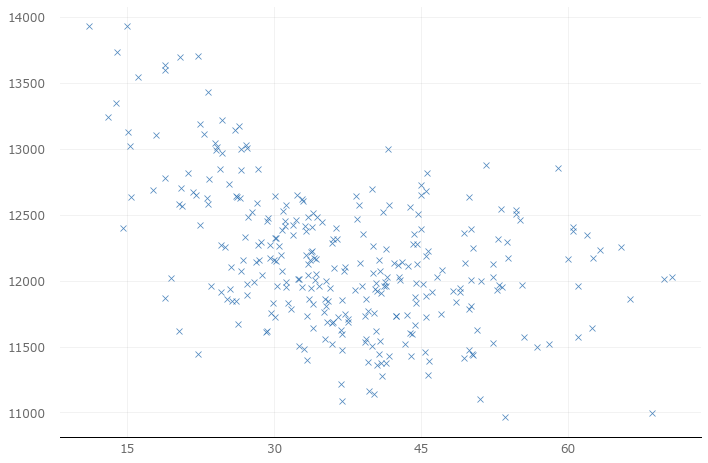

In [74]:
# a regression plot for two dimensions 
analyze_object.plot_regs('val_mean_absolute_percentage_error', 'val_loss')

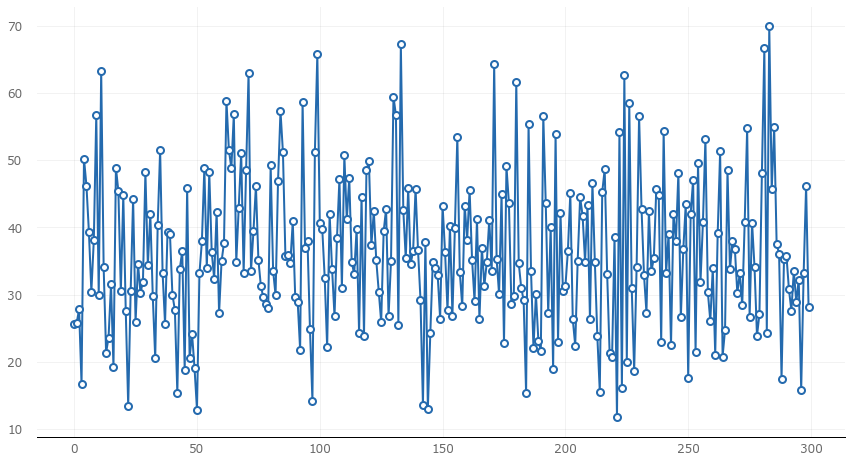

In [50]:
# line plot
analyze_object.plot_line('val_mean_absolute_percentage_error')

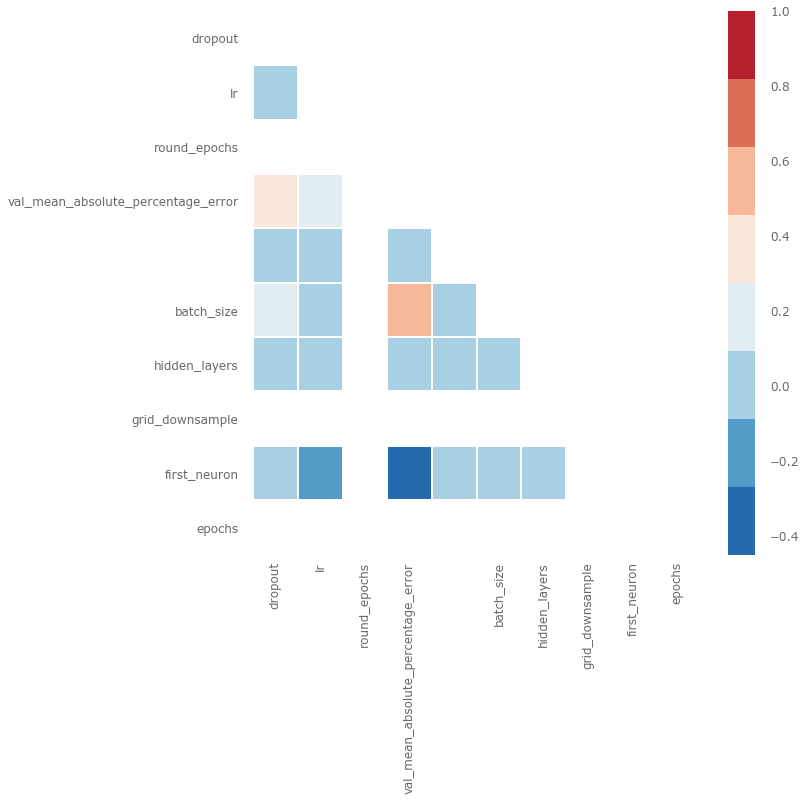

In [76]:
# heatmap correlation
analyze_object.plot_corr('val_mean_absolute_percentage_error', ['val_mean_absolute_percentage_error', 'loss', 'val_loss','mean_absolute_percentage_error'])

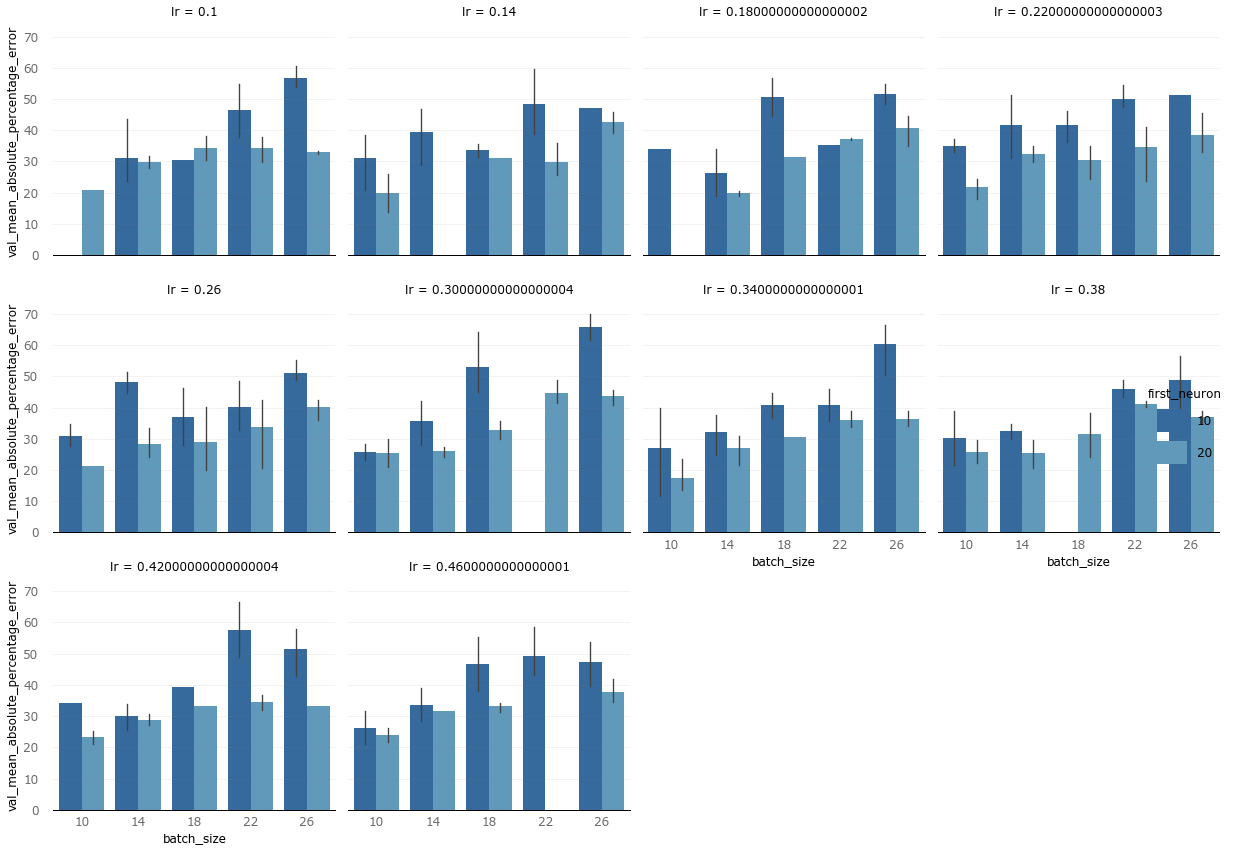

In [51]:
# a four dimensional bar grid
analyze_object.plot_bars('batch_size', 'val_mean_absolute_percentage_error', 'first_neuron', 'lr')

## Generating predictions by using the trained model

'''Best model doesnt working, check later'''

In [52]:
best_model = t.best_model(metric='val_mean_absolute_percentage_error', asc=True)

ValueError: ('Invalid `distribution` argument: expected one of {"normal", "uniform"} but got', 'truncated_normal')

In [100]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                170       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 66        
_________________________________________________________________
dropout_1 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 14        
_________________________________________________________________
dropout_2 (Dropout)          (None, 2)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3

In [80]:
import numpy as np
from sklearn.utils import check_array

def mean_absolute_percentage_error(y_true, y_pred): 
    """
    measures mape score
    """

#     y_true, y_pred = check_array(y_true, y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [114]:
mean_absolute_percentage_error(Y_test, best_model.predict(X_test)[:,-1])

17.185139097920306